Different morphologies of the same neuron type might require different activation to reach comparable firing frequency. InputScaling simulates a network of a neuron type with different number of inputs, and different frequency to infer what level of input is needed.

Here we look at the input to ```neuron_types="fs"```.

During a simulation we can vary the input frequency, but not the number of inputs coupled to a neuron, so we use a set of ```num_replicas``` copies of each morphology, each receiving a different number of inputs from ```num_input_min``` to ```num_input_max``` of a given ```input_type``` (e.g. for striatum "cortical" or "thalamic"). 

A set of input frequencies are tested, specified by ```input_frequency_range```, and each of these frequencies is run for ```input_duration``` seconds. In this example we create a small example, but we recommend that use use a longer input duration (e.g. 10 seconds, or possibly more).

In [1]:
import os
from snudda.input.input_tuning import InputTuning
network_path = os.path.join("networks", "input_tuning-crtx")
input_tuning = InputTuning(network_path)

We create a network without any synapses and connect different number of external inputs to the neurons. Each neuron then receives a range of input frequencies.

In [2]:
path = os.path.abspath('../../Neuromodulation/single_cell_models/HBP-2021Q1/striatum')

In [9]:
neurons_path = os.path.join(path)
input_tuning.setup_network(neurons_path=neurons_path, 
                           num_replicas=5,
                           neuron_types="ispn")
input_tuning.setup_input(input_type="cortical",  # eg. "cortical" or "thalamic"
                         num_input_min=10,
                         num_input_max=200,
                         input_duration=3.0,
                         input_frequency_range=[2.0])


Skipping neuron type dspn
Skipping neuron type fs
Found 4 neurons in /home/jofrony/Documents/Repositories/BasalGangliaExperiments/Neuromodulation/single_cell_models/HBP-2021Q1/striatum/ispn
Writing network config file to networks/input_tuning-crtx/network-config.json
Processing x = 0/13, y = 0/13
Processing x = 0/13, y = 1/13
Processing x = 0/13, y = 2/13
Processing x = 0/13, y = 3/13
Processing x = 0/13, y = 4/13
Processing x = 0/13, y = 5/13
Processing x = 0/13, y = 6/13
Processing x = 0/13, y = 7/13
Processing x = 0/13, y = 8/13
Processing x = 0/13, y = 9/13
Processing x = 0/13, y = 10/13
Processing x = 0/13, y = 11/13
Processing x = 0/13, y = 12/13
Processing x = 1/13, y = 0/13
Processing x = 1/13, y = 1/13
Processing x = 1/13, y = 2/13
Processing x = 1/13, y = 3/13
Processing x = 1/13, y = 4/13
Processing x = 1/13, y = 5/13
Processing x = 1/13, y = 6/13
Processing x = 1/13, y = 7/13
Processing x = 1/13, y = 8/13
Processing x = 1/13, y = 9/13
Processing x = 1/13, y = 10/13
Processi

In [10]:
from snudda.input import SnuddaInput

si = SnuddaInput(input_config_file=input_tuning.input_config_file,
                 hdf5_network_file=input_tuning.network_file,
                 spike_data_filename=input_tuning.input_spikes_file,
                 time=input_tuning.max_time)
si.generate()

Writing spikes to networks/input_tuning-crtx/input.hdf5


In [ ]:
!nrnivmodl mechanisms-ispn/

For large runs, to simulate in parallel use:

```mpiexec -n 4 python3 ../../snudda/input/input_tuning.py simulate networks/input_tuning/```

Below we just run it in serial in the notebook.

In [11]:
!mpiexec -n 4 python3 ../../../Snudda/snudda/input/input_tuning.py simulate networks/input_tuning-crtx/

numprocs=4
Run simulation...
Tip, to run in parallel on your local machine use: mpiexec -n 4 python3 tuning/input_tuning.py simulate <yournetworkhere>
Run simulation...
Tip, to run in parallel on your local machine use: mpiexec -n 4 python3 tuning/input_tuning.py simulate <yournetworkhere>
Run simulation...
Tip, to run in parallel on your local machine use: mpiexec -n 4 python3 tuning/input_tuning.py simulate <yournetworkhere>
Run simulation...
Tip, to run in parallel on your local machine use: mpiexec -n 4 python3 tuning/input_tuning.py simulate <yournetworkhere>
Loading 20 neurons with 0 synapses and 0 gap junctions
Loading 20 neurons with 0 synapses and 0 gap junctions
Loading 20 neurons with 0 synapses and 0 gap junctions
Loading 20 neurons with 0 synapses and 0 gap junctions
Running simulation for 3000.0 ms.
Running simulation for 3000.0 ms.
Running simulation for 3000.0 ms.
Running simulation for 3000.0 ms.
Running simulation for 3.0 s
Running simulation for 3.0 s
Running simulat

In [ ]:
input_tuning.simulate()

Loading 20 neurons with 0 synapses and 0 gap junctions


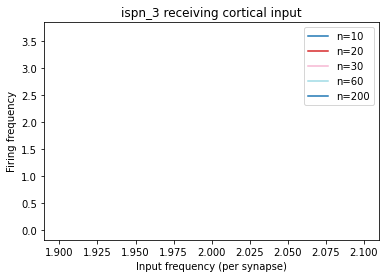

<Figure size 432x288 with 0 Axes>

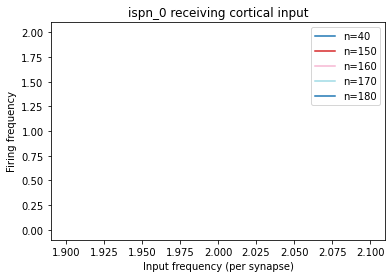

<Figure size 432x288 with 0 Axes>

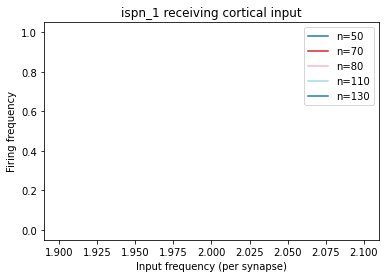

<Figure size 432x288 with 0 Axes>

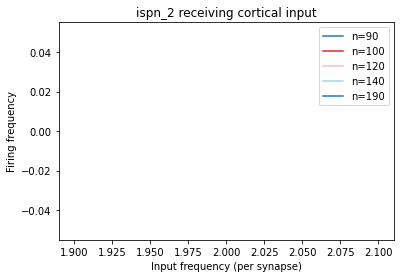

<Figure size 432x288 with 0 Axes>

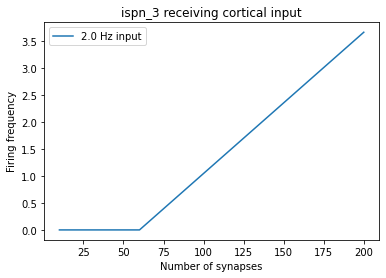

<Figure size 432x288 with 0 Axes>

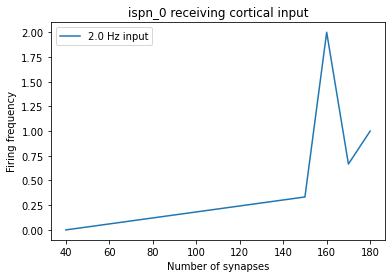

<Figure size 432x288 with 0 Axes>

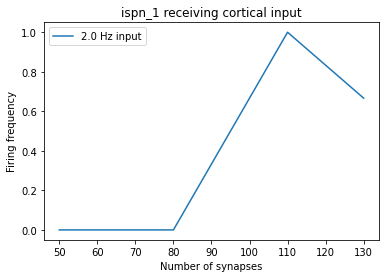

<Figure size 432x288 with 0 Axes>

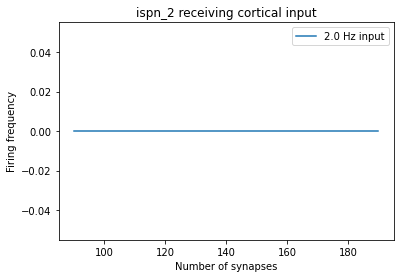

To plot traces:
python3 plotting/Network_plot_traces.py networks/input_tuning-crtxoutput_volt.txt networks/input_tuning-crtxnetwork-synapses.hdf5 


<Figure size 432x288 with 0 Axes>

In [14]:
input_tuning.analyse_results(show_plots=True)

Unable to guess ID, using 666.
Loading 20 neurons with 0 synapses and 0 gap junctions
!!! Excluding first 0s from the plot
Plotting traces: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Plotted 20 traces (total 20)
Saving to figure Network-spikes-666-ispn-colour.pdf


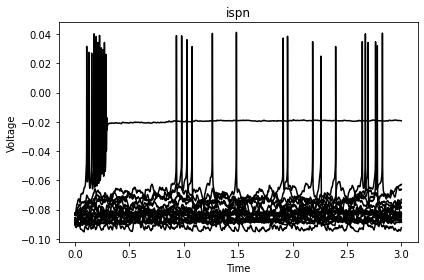

<Figure size 432x288 with 0 Axes>

In [16]:
from snudda.plotting.plot_traces import PlotTraces
import os

plot_offset = 0  # -0.2
skip_time = 0  # 0.5
num_traces_max = 50

network_path = os.path.join("networks","input_tuning-crtx")
network_file = os.path.join(network_path, "network-synapses.hdf5")
volt_file_name = os.path.join(network_path, "output_volt.txt")

pl = PlotTraces(file_name=volt_file_name,network_file=network_file)

pl.plotTraceNeuronType(neuron_type='ispn',num_traces=num_traces_max, offset=plot_offset, skip_time=skip_time)